# Supp Fig 2

In [2]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
from scipy.interpolate import interp1d
import h5py

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<ipython-input-2-05d49b49bf6d>:14: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)


In [5]:
results=np.loadtxt('simulations/simulations_fixed_gs/results.txt');
sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]
sim_convergence_all=results[:,20:24]
sim_decay_all=results[:,26]/results[:,27]


Possible_Tmax_over_tau_E=np.unique(sim_param_all[:,14])
Possible_sigma_Lambda_over_Lambda=np.unique(sim_param_all[:,10])
Possible_r_X=np.unique(sim_param_all[:,12])
Possible_J=np.unique(sim_param_all[:,11])

results_gs=np.loadtxt('simulations/simulations_vs_gs/results.txt');
sim_param_all_gs=results_gs[:,0:15]
moments_of_r_sim_all_gs=results_gs[:,15:20]
sim_convergence_all_gs=results_gs[:,20:24]
sim_decay_all_gs=results_gs[:,26]/results_gs[:,27]

Possible_Tmax_over_tau_E_gs=np.unique(sim_param_all_gs[:,14])
Possible_sigma_Lambda_over_Lambda_gs=np.unique(sim_param_all_gs[:,10])
Possible_r_X_gs=np.unique(sim_param_all_gs[:,12])
Possible_J_gs=np.unique(sim_param_all_gs[:,11])
Possible_g_E_gs=np.unique(sim_param_all_gs[:,2])
Possible_g_I_gs=np.unique(sim_param_all_gs[:,3])
#sigma_t,tau_rp,g_E,g_I,beta,K,p,sigma_X_over_r_X,1,
#Lambda,sigma_Lambda_over_Lambda,J,r_X[idx_r_X],L[idx_L],Tmax_over_tau_E


filename = 'DMFT/fig4.h5'

DMFT=h5py.File(filename, "r")
print(list(DMFT.keys()))
print(list(DMFT['D'].keys()))

['A', 'B', 'C', 'D', 'P']
['Js', 'chs', 'convs', 'cov_mu_E_delta_mu_Es', 'cov_mu_I_delta_mu_Is', 'cov_r_E_delta_r_Es', 'cov_r_I_delta_r_Is', 'delta_mu_Es', 'delta_mu_Is', 'delta_r_Es', 'delta_r_Is', 'mu_Es', 'mu_Is', 'r_Es', 'r_Is', 'sls', 'var_delta_mu_Es', 'var_delta_mu_Is', 'var_delta_r_Es', 'var_delta_r_Is', 'var_mu_Es', 'var_mu_Is', 'var_r_Es', 'var_r_Is']


7.7e-05
0.000215
0.000599
0.001
1e-05
1.7e-05
2.8e-05
4.6e-05


<ipython-input-8-e48f8e636e45>:203: RuntimeWarning: invalid value encountered in sqrt
  std_delta_rs=np.sqrt(var_delta_rs)
<ipython-input-8-e48f8e636e45>:203: RuntimeWarning: invalid value encountered in sqrt
  std_delta_rs=np.sqrt(var_delta_rs)
<ipython-input-8-e48f8e636e45>:203: RuntimeWarning: invalid value encountered in sqrt
  std_delta_rs=np.sqrt(var_delta_rs)


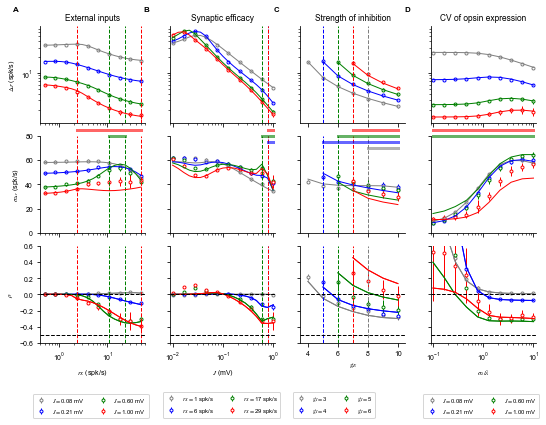

In [8]:
rows=3
cols=4
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), 
                        facecolor='w', edgecolor='k',
                       sharex='col',sharey='row')
fig.subplots_adjust(hspace = .5, wspace=.5)
area=4.0;linethicknes=1.0;
axs = axs.ravel()
for idx in np.arange(rows*cols):
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)


axs[0].text(-.2, 1.2,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.2,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.2,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[3].text(-.2, 1.2,'D', transform=axs[3].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');



axs[0*cols].set_ylabel(r'$\Delta r$ (spk/s)')
axs[1*cols].set_ylabel(r'$\sigma_{\Delta r}$ (spk/s)')
axs[2*cols].set_ylabel(r'$\rho$')

axs[0*cols].set_title(r'External inputs')
axs[0*cols+1].set_title(r'Synaptic efficacy')
axs[0*cols+2].set_title(r'Strength of inhibition')
axs[0*cols+3].set_title(r'CV of opsin expression')



#axs[1].set_xlim([0.009,1.2])
#axs[0].set_ylim([0.0,80])
axs[1+1*cols].set_ylim([0,80])
axs[1+2*cols].set_ylim([-0.55,0.55])

axs[1].set_xscale('log')
axs[0].set_yscale('log')
#axs[0].set_ylim([0.05,50])

#axs[2].set_xlim([1.5,9.5])

#axs[0].set_xlim([0.01,1.5])
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[3].set_xscale('log')



    
axs[8+0].set_xlabel(r'$r_X$ (spk/s)')
axs[8+1].set_xlabel(r'$J$ (mV)')
axs[8+2].set_xlabel(r'$g_E$')
axs[8+3].set_xlabel(r'$\sigma_{\lambda}/\lambda$')


color=['grey','b','g','r']


mask_SL=sim_param_all[:,10]==Possible_sigma_Lambda_over_Lambda[6]

count=0
for idx_case in [4,6,8,9]:
    mask=mask_SL&(sim_param_all[:,11]==Possible_J[idx_case])
    data_x=sim_param_all[mask,12]
    for idx_rows in [0,1,2]:
        if idx_rows==0:
            data_y=moments_of_r_sim_all[mask,1]
        if idx_rows==1:
            data_y=moments_of_r_sim_all[mask,3]
        if idx_rows==2:
            data_y=moments_of_r_sim_all[mask,4]/moments_of_r_sim_all[mask,3]**2
        data_y_med=np.zeros((len(np.unique(data_x)),3))
        for idx in range(len(np.unique(data_x))):
            mask_x=data_x==np.unique(data_x)[idx]
            data_y_med[idx,0]=np.mean(data_y[mask_x])
            data_y_med[idx,1]=stats.sem(data_y[mask_x])
            data_y_med[idx,2]=np.std(data_y[mask_x])

        axs[0+idx_rows*cols].errorbar(x=np.unique(data_x),
                              y=data_y_med[:,0],
                              yerr=data_y_med[:,2],c=color[count], 
                                      ms=3, fmt='o', mfc='white', zorder=1,
                                      label=r'$J=$%.2f mV'%(Possible_J[idx_case]*10**3))

    count=count+1

count=0
count_chaos=1
for idx_case in [2,5,7,8]:
    mask=mask_SL&(sim_param_all[:,12]==Possible_r_X[idx_case])
    data_x=sim_param_all[mask,11]*10**3
    for idx_rows in [0,1,2]:
        if idx_rows==0:
            data_y=moments_of_r_sim_all[mask,1]
        if idx_rows==1:
            data_y=moments_of_r_sim_all[mask,3]
        if idx_rows==2:
            data_y=moments_of_r_sim_all[mask,4]/moments_of_r_sim_all[mask,3]**2
        data_y_med=np.zeros((len(np.unique(data_x)),3))
        for idx in range(len(np.unique(data_x))):
            mask_x=data_x==np.unique(data_x)[idx]
            data_y_med[idx,0]=np.mean(data_y[mask_x])
            data_y_med[idx,1]=stats.sem(data_y[mask_x])
            data_y_med[idx,2]=np.std(data_y[mask_x])

        axs[1+idx_rows*cols].errorbar(x=np.unique(data_x),
                              y=data_y_med[:,0],
                              yerr=data_y_med[:,2],c=color[count], 
                                      ms=3, fmt='o', mfc='white', zorder=1,
                                      label=r'$r_X=$%d spk/s'%Possible_r_X[idx_case])
  
    count=count+1

    
mask_r_X=(sim_param_all[:,12]==Possible_r_X[7])
count=0
count_chaos=0
for idx_case in [4,6,8,9]:
    print(Possible_J[idx_case])
    mask=mask_r_X&(sim_param_all[:,11]==Possible_J[idx_case])
    data_x=sim_param_all[mask,10]
    for idx_rows in [0,1,2]:
        if idx_rows==0:
            data_y=moments_of_r_sim_all[mask,1]
        if idx_rows==1:
            data_y=moments_of_r_sim_all[mask,3]
        if idx_rows==2:
            data_y=moments_of_r_sim_all[mask,4]/moments_of_r_sim_all[mask,3]**2
        data_y_med=np.zeros((len(np.unique(data_x)),3))
        for idx in range(len(np.unique(data_x))):
            mask_x=data_x==np.unique(data_x)[idx]
            data_y_med[idx,0]=np.mean(data_y[mask_x])
            data_y_med[idx,1]=stats.sem(data_y[mask_x])
            data_y_med[idx,2]=np.std(data_y[mask_x])

        axs[3+idx_rows*cols].errorbar(x=np.unique(data_x),
                              y=data_y_med[:,0],
                              yerr=data_y_med[:,2],c=color[count], 
                                      ms=3, fmt='o', mfc='white',
                                      zorder=1,label=r'$J=$%.2f mV'%(Possible_J[idx_case]*10**3))

    count=count+1    
    
    
CV_opto=np.unique(data_x)

mask_J=(sim_param_all_gs[:,11]==Possible_J_gs[8])
count=0
count_chaos=1
for idx_case in [0,1,2,3]:
    print(Possible_J_gs[idx_case])
    mask=(sim_param_all_gs[:,3]==Possible_g_E_gs[idx_case])&mask_J

    data_x=sim_param_all_gs[mask,2]
    for idx_rows in [0,1,2]:
        if idx_rows==0:
            data_y=moments_of_r_sim_all_gs[mask,1]
        if idx_rows==1:
            data_y=moments_of_r_sim_all_gs[mask,3]
        if idx_rows==2:
            data_y=moments_of_r_sim_all_gs[mask,4]/moments_of_r_sim_all_gs[mask,3]**2
        data_y_med=np.zeros((len(np.unique(data_x)),3))
        for idx in range(len(np.unique(data_x))):
            mask_x=data_x==np.unique(data_x)[idx]
            data_y_med[idx,0]=np.mean(data_y[mask_x])
            data_y_med[idx,1]=stats.sem(data_y[mask_x])
            data_y_med[idx,2]=np.std(data_y[mask_x])

        axs[2+idx_rows*cols].errorbar(x=np.unique(data_x),
                              y=data_y_med[:,0],
                              yerr=data_y_med[:,2],c=color[count], 
                                      ms=3, fmt='o', mfc='white',
                                      zorder=1,label=r'$g_I=$%d'%(Possible_g_E_gs[idx_case]))

    

    count=count+1
  
columns=['A','B','C','D',]
for idx_col in [0,1,2,3]:
    DMFT_panel=DMFT[columns[idx_col]]

    for idx_case in range(4):
        if idx_col==0:
            xvals=DMFT_panel['r_Xs'][:]
        if idx_col==1:
            xvals=DMFT_panel['Js'][:]
        if idx_col==2:
            xvals=DMFT_panel['gEs'][:]
            gIs=DMFT_panel['gIs'][idx_case]
            xvals=xvals[xvals>gIs]
        if idx_col==3:
            xvals=DMFT_panel['sls'][:]#CV_opto
        delta_r_Es=DMFT_panel['delta_r_Es'][:,idx_case]
        delta_r_Is=DMFT_panel['delta_r_Is'][:,idx_case]
        delta_rs=0.8*delta_r_Es+0.2*delta_r_Is
        axs[idx_col+0*cols].plot(xvals,delta_rs[-len(xvals)::],color=color[idx_case])
        
        var_delta_r_Es=DMFT_panel['var_delta_r_Es'][:,idx_case]
        var_delta_r_Is=DMFT_panel['var_delta_r_Is'][:,idx_case]
        var_delta_rs=0.8*var_delta_r_Es+0.2*var_delta_r_Is
        std_delta_rs=np.sqrt(var_delta_rs)
        axs[idx_col+1*cols].plot(xvals,std_delta_rs[-len(xvals)::],color=color[idx_case])

        cov_r_E_delta_r_Es=DMFT_panel['cov_r_E_delta_r_Es'][:,idx_case]
        cov_r_I_delta_r_Is=DMFT_panel['cov_r_I_delta_r_Is'][:,idx_case]
        cov_r_delta_rs=0.8*cov_r_E_delta_r_Es+0.2*cov_r_I_delta_r_Is
        RS_idx=cov_r_delta_rs/var_delta_rs

        axs[idx_col+2*cols].plot(xvals,RS_idx[-len(xvals)::],color=color[idx_case])
        

        
        axs[idx_col+2*cols].plot(xvals,RS_idx[-len(xvals)::],color=color[idx_case])


    
    
        binary_chaos=DMFT_panel['chs'][:,idx_case]
        
        mask_chaos=binary_chaos==1
        if (np.size(binary_chaos[mask_chaos])>0):
            xmin=np.min(xvals[mask_chaos[-len(xvals)::]])
            xmax=np.max(xvals)
            if binary_chaos[-1]==0:
                xmax=np.max(xvals[mask_chaos[-len(xvals)::]])
            #x,y = np.array([[xmin, xmax], [90+5*idx_case,90+5*idx_case]])
            x,y = np.array([[xmin, xmax], [70+5*idx_case,70+5*idx_case]])
            line = mpl.lines.Line2D(x, y, lw=3.,ls='-',color=color[idx_case], alpha=0.6,clip_on=False, zorder=100)
            
            axs[cols+idx_col].add_line(line) 
            if idx_col<3:
                for idx_nic in [0,1,2,]:
                    axs[idx_nic*cols+idx_col].axvline(x=np.min(x),ls='--',color=color[idx_case])
                    if idx_col==0&idx_case==0:
                        axs[idx_nic*cols+idx_col].axvline(x=np.max(x),ls='--',color=color[idx_case])
            #if binary_chaos[-1]==0:
            #    axs[cols*idx_row+idx_col].axvline(x=np.max(xvals[mask_chaos[-len(xvals)::]]),ls='--',color=color[idx_case])


for idx in range(4):
    #axs[idx].legend(prop={'size': 6},loc='best',ncol=2)
    axs[idx+2*cols].axhline(y=0,ls='--',c='k')
    axs[idx+2*cols].axhline(y=-0.5,ls='--',c='k')
    axs[idx+2*cols].set_ylim([-0.6,0.6])
    axs[idx+2*cols].legend(prop={'size': 6},
                                  ncol=2,
                                  loc='lower left',bbox_to_anchor=(-0.1, -0.8),)



axs[0].set_xlim([0.4,60])
axs[1].set_xlim([0.009,1.1])

axs[2].set_xlim([3.5,10.5])

axs[3].set_xlim([0.09,11])


plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
#'''
pic_name='Supp_Figure_2_.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Supp_Figure_2_.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
#'''